<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)
import seaborn as sns; sns.set()
sns.set(style="ticks", color_codes=True)
sns.set_context("notebook")

In [4]:
sns.set({ "figure.figsize": (12/1.5,8/1.5) })

The [PIMA Indians Diabetes Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) was compiled by is the National Institute of Diabetes and Digestive and Kidney Diseases (US); the goal was to predict whether or not a patient had diabetes, based on certain diagnostic measurements (e.g., glucose level, diastolic blood pressure). It can be downloaded from [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database#diabetes.csv).

The [documentation](https://archive.ics.uci.edu/ml/datasets/diabetes) says

> ...for Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

In [5]:
pima_df = pd.read_csv('../data/pima-indians-diabetes/diabetes.csv')

Firstly, we will have a glimpse at the data, making a quick inspection of its structure and content.

In [6]:
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Now, we shall see summary of the features and their data types - roughly, the distinction is between numbers (discrete and continuous) and strings; also, provides an idea of number of observations and the number of missing values for each feature.

In [7]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In this case, no missing values seem to have been recorded (we will see later that this might not be the case). The low-level `numpy` data types here usually tell us that `int64` are whole numbers (integers), `float64` are continuous values (floats), and `object` are strings.

If you'd like, you can always check the names (and the order) of the columns:

In [14]:
pima_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object')

The returned value is a `pandas` `Index`; recall that a DataFrame is 2D structure composed of rows and columns; columns are defined by an __index__; a column name is an index __label__.

You can also check what the row index looks like. In this case, it is not very interesting: a sequence of integers has been created automatically to represent each row uniquely.

In [15]:
pima_df.index

RangeIndex(start=0, stop=768, step=1)

Obtain a table of crucial summaries of a univariate data distribution; the usual *5-number summary* (min, max, 1st quartile, 3rd quartile, median), and mean and stardard deviation. Let us use `Age` as an example.

In [8]:
pima_df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

It is normally useful to, in addition, inspect data distributions with plots. For quantitative data, a histogram is one of the first go-to structures. Let us do it for `Pregnancies`.

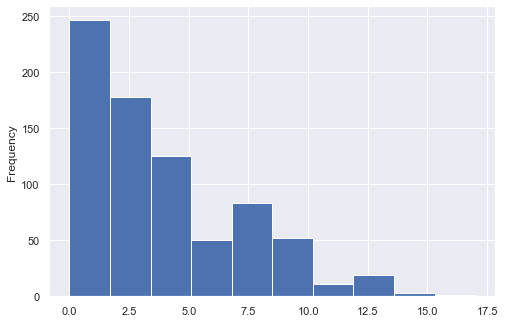

In [10]:
pima_df['Pregnancies'].plot.hist();

The semicolon at the end is simply to supress some unncessary text-based output.

The bins are arbitrary; different binning might results in slightly different shapes. For that reason, a kernel-density estimate (KDE) is commonly preferred or simply used in addition. We will look at the KDE for `Pregnancies`, firstly, using the DataFrame's plot capabilities (recall that `pandas` provides a wrapper on `matplolib`'s functionality to make our lifes easier).

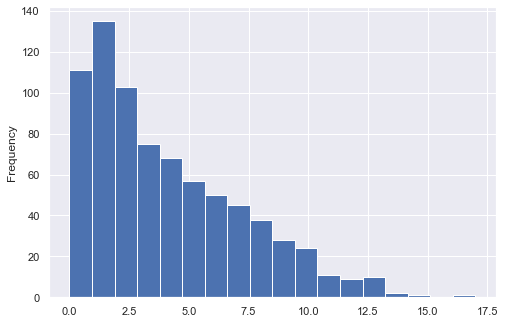

In [13]:
pima_df['Pregnancies'].plot.hist(bins=18);

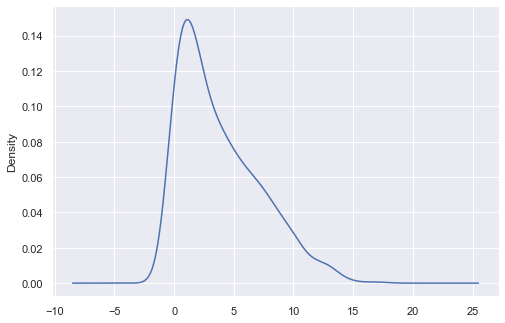

In [11]:
pima_df['Pregnancies'].plot.kde();

One can combine histograms and KDEs, for example, with `seaborn`'s `.distplot()`. Let us do it for diastolic blood pressure.

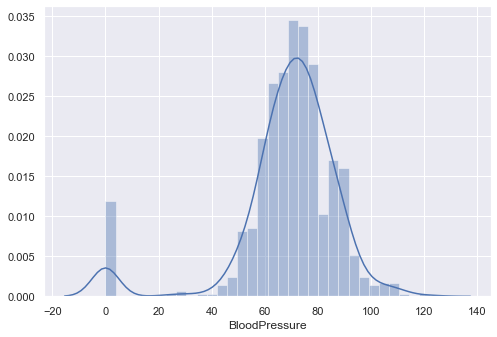

In [17]:
sns.distplot(pima_df['BloodPressure']);

What are all those zero (or close to zero) observations?

A box-plot is quite useful for visualising the five-number summary as well as identify any __outliers__. The latter can just be unusual or extreme values, or noisy, missing, or erroneous data.

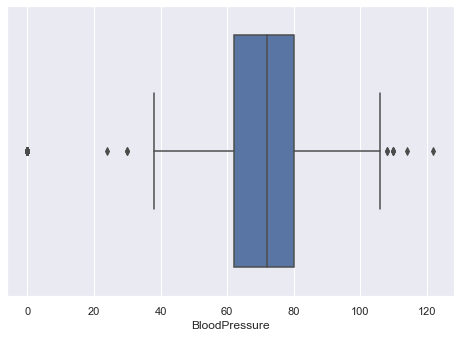

In [19]:
sns.boxplot(pima_df['BloodPressure']);

In [20]:
pima_df.loc[ pima_df['BloodPressure']==0 ].sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
193,11,135,0,0,0,52.3,0.578,40,1
336,0,117,0,0,0,33.8,0.932,44,0
522,6,114,0,0,0,0.0,0.189,26,0
453,2,119,0,0,0,19.6,0.832,72,0
269,2,146,0,0,0,27.5,0.240,28,1


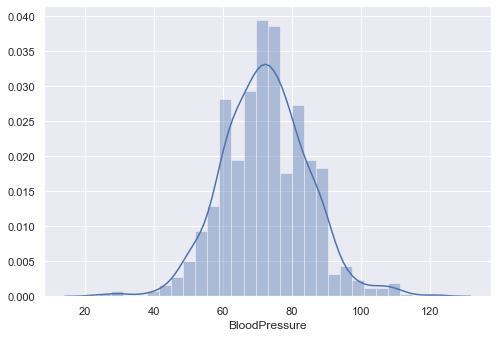

In [24]:
sns.distplot(pima_df.loc[ pima_df['BloodPressure']!=0 ]['BloodPressure']);

For categorical variables - in our case study, there seems to be only `outcome`, the statistical summaries and the options for data distribution plots change. For example:

In [25]:
pima_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

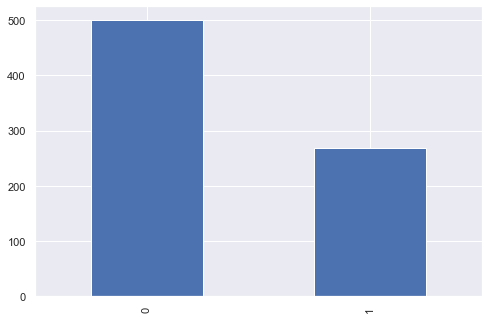

In [27]:
pima_df['Outcome'].value_counts().plot.bar();

As shown, it is useful to see it as a bar chart). We can use the DataFrame plotting functionality for that, and also customise the `matplotlib` `axis` object (for example, by setting `x` and `y` labels).

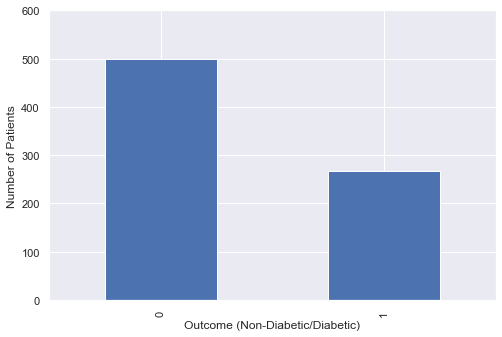

In [30]:
ax = pima_df['Outcome'].value_counts(sort=False).plot.bar()
ax.set_xlabel('Outcome (Non-Diabetic/Diabetic)')
ax.set_ylabel('Number of Patients')
ax.set_ylim(0,600);

Help with a method? Documentation in the notebook?

In [140]:
sns.barplot?

Again, we can `seaborn`'s alternatives for plotting the frequency distribution.

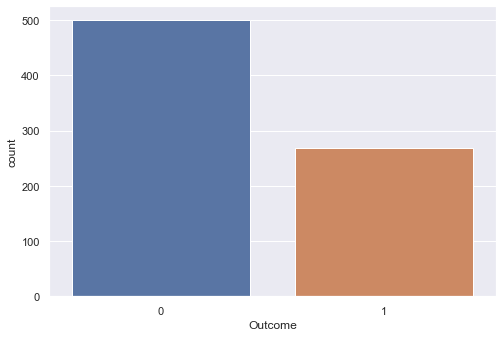

In [31]:
sns.countplot(pima_df['Outcome'])

Note that as `outcome` is expressed as numbers, `pandas` would have infered its data type as `int64` or something similar, despite `outcome` being, in reality, a categorical feature. Some methods such as `.describe()` would rely on this assumption:

In [32]:
pima_df['Outcome'].describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

It makes sense to tell `pandas` that `Outcome` is categorical: one approach is to convert it to the data type `category` as follows:

In [33]:
pima_df['Outcome'] = pima_df['Outcome'].astype('category')

In [34]:
pima_df['Outcome'].describe()

count     768
unique      2
top         0
freq      500
Name: Outcome, dtype: int64

In [35]:
pima_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**checkpoint**: it is probably a good idea now for you to review the above and replicate the analysis on other features of the dataset. What can you learn from the data distribution and, in some cases, outliers?

How many missing values do we actually have for `BloodPressure`?

In [37]:
len(pima_df.loc[ pima_df['BloodPressure']==0 ])

35

And for both `BMI` and `SkinThickness`?

In [44]:
len(pima_df.loc[ (pima_df['BMI']==0) & (pima_df['SkinThickness']==0) ])

9

Let us have quick look at a random sample of the above:

In [46]:
no_BMI_SkinThickness_df = pima_df.loc[ (pima_df['BMI']==0) & (pima_df['SkinThickness']==0) ]

In [47]:
no_BMI_SkinThickness_df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
706,10,115,0,0,0,0.0,0.261,30,1
9,8,125,96,0,0,0.0,0.232,54,1
426,0,94,0,0,0,0.0,0.256,25,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


What is the distribution of `Outcome` over those with 3 or more pregnancies, and how does it compare to those below?

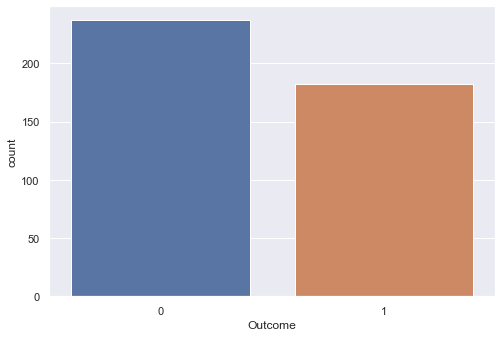

In [49]:
sns.countplot(pima_df.loc[ pima_df['Pregnancies']>=3 ]['Outcome']);

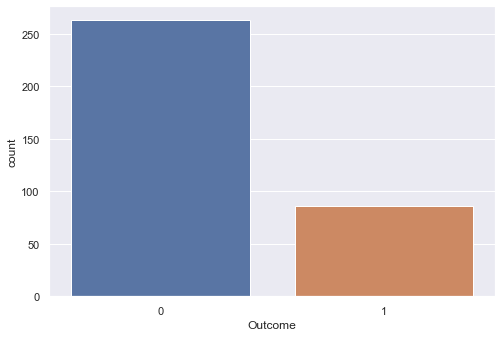

In [50]:
sns.countplot(pima_df.loc[ pima_df['Pregnancies']<3 ]['Outcome']);

We could also have a look at the top and the bottom 10% of BMI.

In [52]:
bmi_90_percentile = pima_df['BMI'].quantile(0.90)
bmi_90_percentile

41.5

In [53]:
bmi_10_percentile = pima_df['BMI'].quantile(0.10)
bmi_10_percentile

23.6

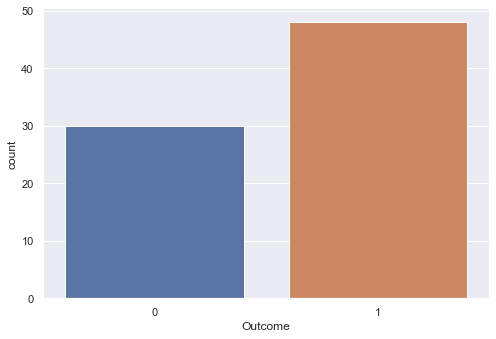

In [54]:
sns.countplot(pima_df.loc[ pima_df['BMI']>=bmi_90_percentile, 'Outcome'])

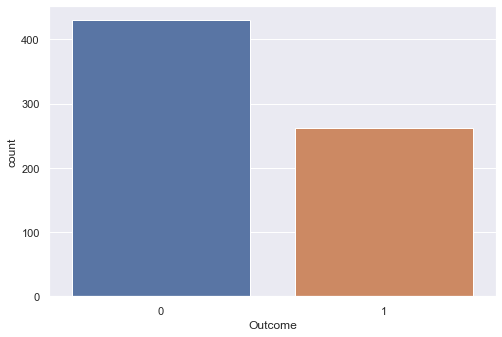

In [56]:
sns.countplot(pima_df.loc[ pima_df['BMI']>=bmi_10_percentile, 'Outcome']);

**checkpoint**:

* for those above average in terms of BMI and skin thickness, what are the numbers of diabetics and non-diabetics? How does that compare to the whole dataset?

* Take a sample of those with BMI and skin thickness above average.

* for those with diabetes, what do the data distributions for number of pregnancies and diastolic blood pressure look like? How do they compare with those without diabetes?
